In [1]:
import pandas as pd
import numpy as np


# So when do we forecast time series data?
* Generally if it DOESN'T look like white noise or random walk, YES
* if it DOES look like WN/RW,it's just not worth it

# Structure of notebook

* White Noise: Theory and Implementation
* Random Walk: Theory and Implementation
* Conclusion

# 1. White Noise

## Theory

* essentially  a sequence of random numbers
    * like random distortions
* in model building, we look at the residuals --the difference between the predicted and actual--
    * if the residuals look like white noise, that's a good thing!
        * random fluctuations are often out of our control and beyond the scope of most models
    * when the residuals have patterns to it -> we need to do more work
    
### When do we classify a time series as white noise?
* It must satisfy these conditions
    * the average value/mean is zero
        * the fluctuations more or less even out/sum to 0
    * standard deviation is constant - it doesn't change over time
    * the correlation between time series and its lagged ersion is not signficant
        * done by investigating correlation between current time series and same times series shifted by N periods

### How do we test if a time series resembles white noise?
* Plot the times series
* Compare the mean and standard deviation over time
* Examine autocorrelation plots


#### Method 1 -- Plotting the time series
* generally, visual inspection can tell you a lot! 
* it is also the easiest way of finding out

In [1]:
import numpy as np
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf

import matplotlib.pyplot as plt
from matplotlib import rcParams
from cycler import cycler

rcParams['figure.figsize'] = 18, 5
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
rcParams['axes.prop_cycle'] = cycler(color=['#365977'])
rcParams['lines.linewidth'] = 2.5

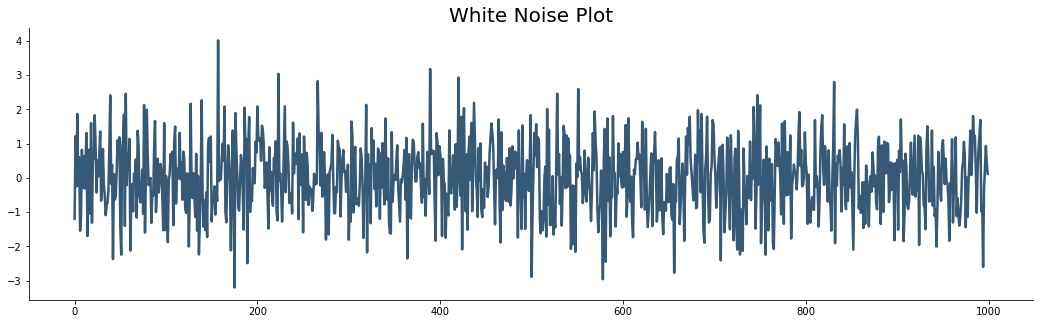

In [2]:
# make some (white) noise!
white_noise = np.random.randn(1000)

# Plot
plt.title('White Noise Plot', size=20)
plt.plot(np.arange(len(white_noise)), white_noise);

* you can see that it doesnt go beyond the bounds of [-2, 3] very much and it generally averages out around 0
* there also aren't any obvious patterns/trends from this

### Method 2 — Comparing mean and standard deviation over time

* If we assume that mean and standard deviations don’t change over time, then both values should be roughly identical for any two subsets.
* The aim here is to split the white noise series into an arbitrary number of chunks (let’s say 20, each having 50 items) and compute the mean and standard deviation for each.

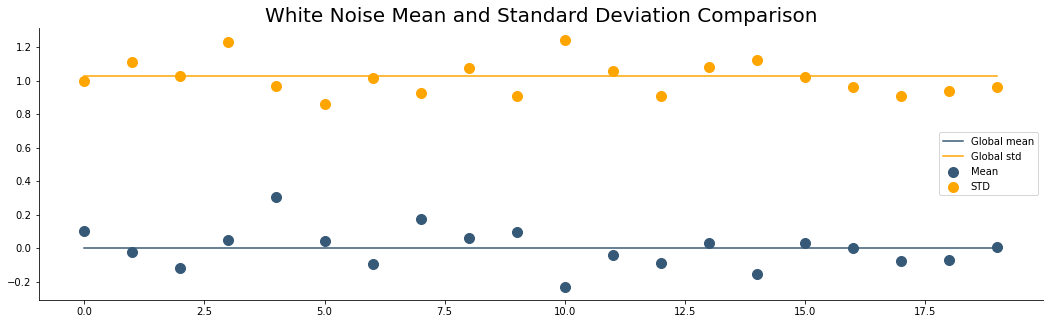

In [3]:
# Split into an arbitraty number of chunks
white_noise_chunks = np.split(white_noise, 20)
means, stds = [], []

# Get the mean and std values for every chunk
for chunk in white_noise_chunks:
    means.append(np.mean(chunk))
    stds.append(np.std(chunk))
    
# Plot
plt.title('White Noise Mean and Standard Deviation Comparison', size=20)
plt.plot(np.arange(len(means)), [white_noise.mean()] * len(means), label='Global mean', lw=1.5)
plt.scatter(x=np.arange(len(means)), y=means, label='Mean', s=100)
plt.plot(np.arange(len(stds)), [white_noise.std()] * len(stds), label='Global std', lw=1.5, color='orange')
plt.scatter(x=np.arange(len(stds)), y=stds, label='STD', color='orange', s=100)
plt.legend();

## Note
* there are definitely slight variations but they still average out to the averages

### Method 3 — Examining autocorrelation plots

* Autocorrelation plot shows the correlation between a time series with itself, lagged by a specific number of periods.
    * Autocorrelation plots also include a shaded area that represents confidence intervals.
        * Anything within the shaded area means that the correlation at that point isn't statistically signficant 
            * i.e. Autocorrelation at lag 0 will have a value of 1 since the correlation is calculated between two identical time series
            

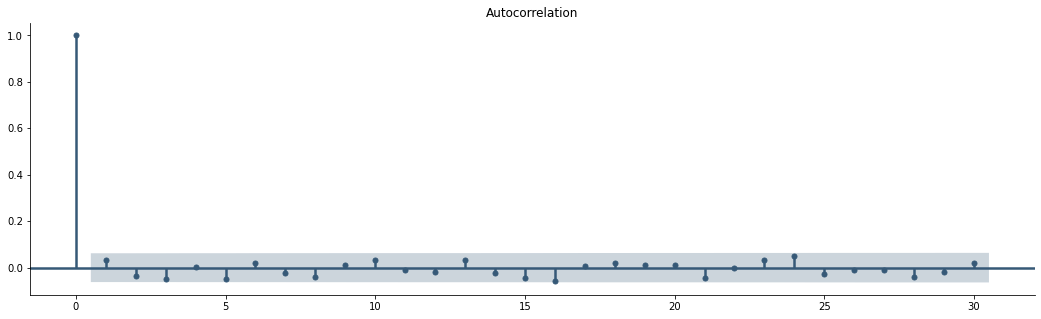

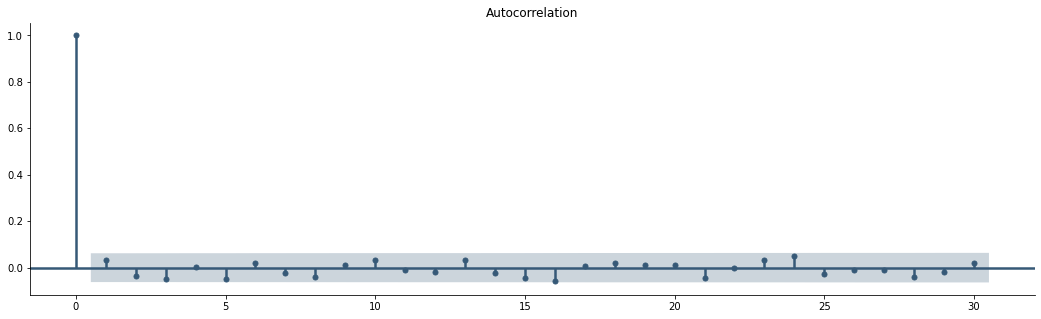

In [5]:
plot_acf(np.array(white_noise))

--
# 2. Random Walk

## Theory

* Similar to white noise, random walk series also aren't predictable
* How is it different from WN?
    * the values aren't a list of random numbers
       * the current values depend on the previous ones
* How do we create a dummy random walk series?
    * start an arbitary value e.g 0
    * the next value is the previous value plus added random variation
    * You can repeat the process of adding additional values as many times as you want.

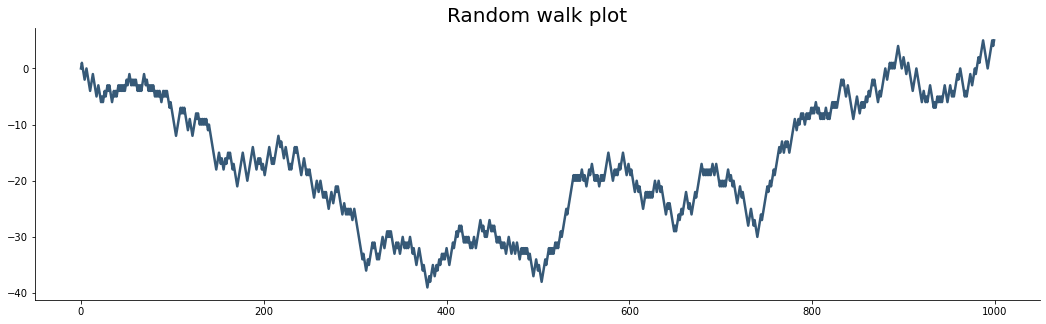

In [6]:
# Start with a random number - let's say 0
random_walk = [0]

for i in range(1,1000):
    # Movement direction based on a random number
    num = -1 if np.random.random() <0.5 else 1
    random_walk.append(random_walk[-1] + num)

# Plot
plt.title('Random walk plot',size=20)
plt.plot(np.arange(len(random_walk)),random_walk)

### Note
* It's quite remniscent of a stock price graph
* Since there's a correlation between current and previous observations, the autocorrelation plot will look very different than with white noise

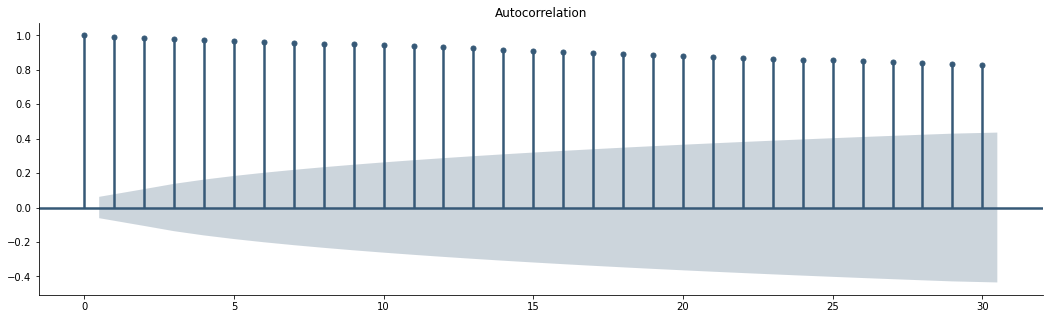

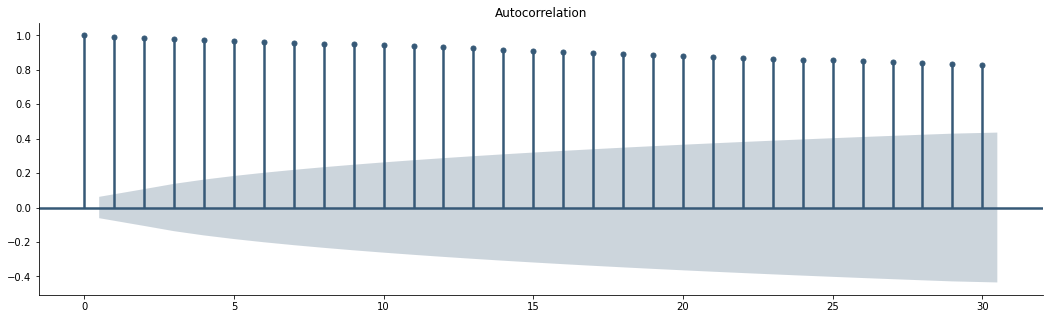

In [7]:
plot_acf(np.array(random_walk))

## Note
* All of the lags are significant
    * Can we model and forecast random walk?
        * <b> No </b>
            * Mostforecasting algorithms generally require stationary data (constant mean, variance and covariance) and random walk isn't stationary

## Making a time series stationary by calculating first-order difference

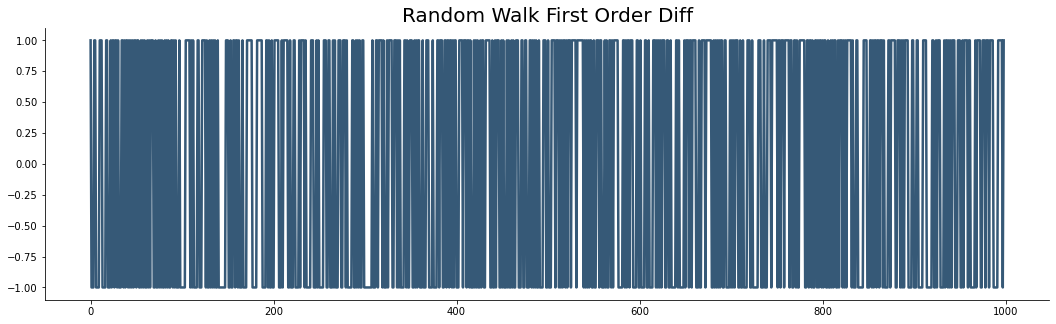

In [8]:
# First order difference
s_random_walk = pd.Series(random_walk)
s_random_walk_diff = s_random_walk.diff().dropna()

#Plot
plt.title('Random Walk First Order Diff', size =20)
plt.plot(np.arange(len(s_random_walk_diff)),s_random_walk_diff)

### Notes
* Values range from -1 to 1 since incremental movement values were used in the randomization process
* if the movement values were random, the differenced random walk would look like white noise
    * Let's plot the autocorrelation chart of differenced random walk values to test this

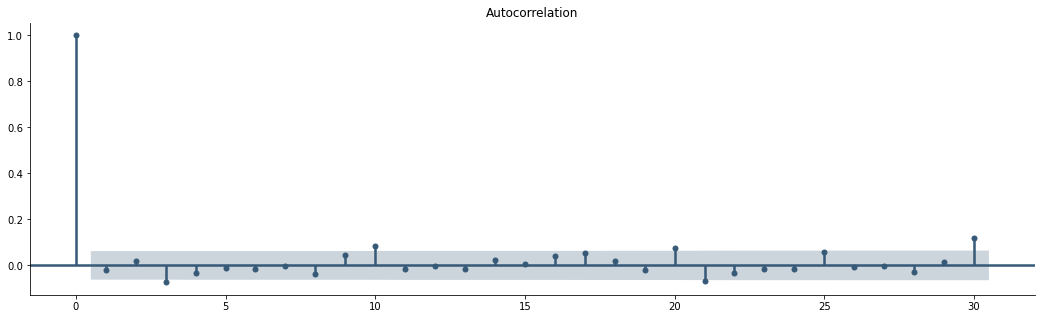

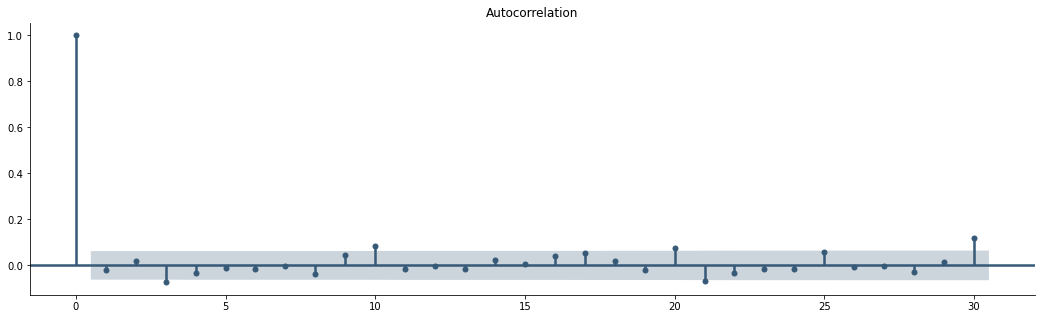

In [10]:
plot_acf(s_random_walk_diff)

### Note
* no learnable patterns are found in random walk once the series is stationary -> don't bother forecasting